In [2]:
import sys, os



%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import os
os.environ['R_HOME'] = 'D:/Program Files/R-4.5.0' #@TODO include in some setup file

from simulation_engine.scenarios.iv.binary_iv import BinaryIV
from simulation_engine.scenarios.iv.continuous_iv import ContinuousIV
from simulation_engine.scenarios.iv.base_iv import IVScenario
from simulation_engine.util.plotting_util import PlottingUtil
from simulation_engine.algorithms.causaloptim import Causaloptim
from simulation_engine.algorithms.zhang_bareinboim import ZhangBareinboim
from simulation_engine.algorithms.apid import Apid
from simulation_engine.algorithms.apid_src.src.models.apid import APID

import pandas as pd
pd.set_option('display.max_columns', None)

#disable warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from simulation_engine.algorithms.zaffalonbounds import ZaffalonBounds
from hydra import compose, initialize
from omegaconf import OmegaConf

C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\TUM Workspace\Thesis Workspace\causal-bounds\simulation_engine\..\simulation_engine\algorithms\apid.py:233: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_name=f'config.yaml', config_path='./apid_src/config/')


# ContinousIV Test

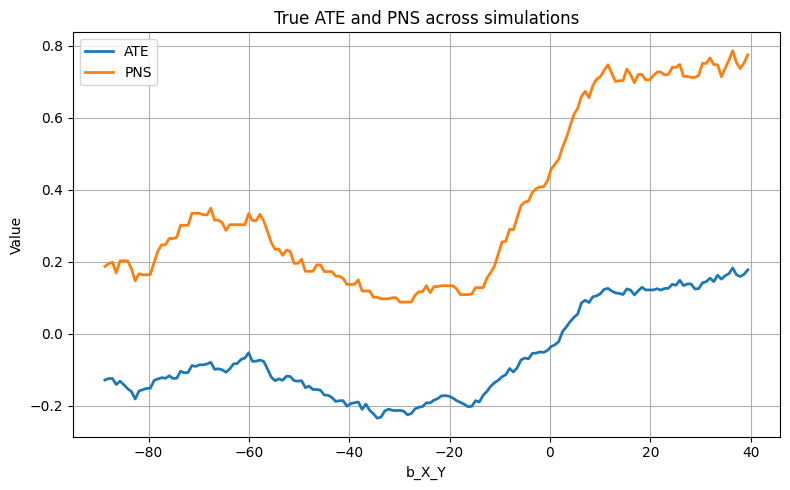

In [52]:
function_keys = [
                "identity",
                "sin",
                "cos",
                "tanh",
                "log1p_abs",
                "exp_neg_sq",
                "sigmoid",
                "exp_clipped"
            ]

data = ContinuousIV.run_rolling_b_X_Y_simulations(
    b_range=(-100, 50), N_points=200, replications=1, n=500,
)
PlottingUtil.plot_ate_pns(data,window=30)

In [43]:
algs = ['ATE_2SLS-0.99']
contIV = ContinuousIV('IV Dag', data)
contIV.run(algs)
# contIV.binaryIV.data
contIV.data

Running ATE_2SLS-0.99...
ATE_2SLS-0.99 completed in 4.68 seconds.
Total runtime: 4.68 seconds.


,seed,b_Z_X,b_U_X,b_X_Y,b_U_Y,p_Z,sigma_X,sigma_Y,sigma_U,g_U_X,g_U_Y,squash_X,squash_Y,g_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,Z,U,X,Y,Y_max,Y_min,X_max,X_min,X_mean,Y_mean,ATE_2SLS-0.99_bound_lower,ATE_2SLS-0.99_bound_upper,ATE_2SLS-0.99_bound_valid,ATE_2SLS-0.99_bound_width,ATE_2SLS-0.99_bound_failed
0,977364,-0.630922,0.447759,-50.000000,0.726512,0.218087,0.255431,0.360768,0.639983,sigmoid,rescaled_identity,tanh_scaled,sigmoid,exp_neg_sq,-1.959934e-01,0.000,0.500000,0.695993,"[0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, ...","[0.07645916272674645, 0.4231588947331375, 0.33...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...","[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.731055,0.500000,1,0,0.558,0.585110,-1.000000,-1.000000,False,-1.998401e-15,False
1,813602,-1.322461,-1.369413,-49.497487,-0.289669,0.173353,0.290902,0.816955,2.112532,zero_centered_tanh,bounded_linear,softplus,tanh_scaled,rescaled_identity,-4.036476e-01,0.000,0.123436,0.527084,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[-1.5304259376218858, 0.06768048199204345, -0....","[1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, ...","[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...",0.799389,0.123254,1,0,0.366,0.375976,-1.000000,0.478317,True,1.478317e+00,False
2,100318,1.415718,0.827558,-48.994975,0.411223,0.685178,0.090667,0.531089,0.257352,rescaled_identity,sine_sym,tanh_scaled,softplus,bounded_linear,-1.708880e-01,0.000,0.238537,0.409425,"[1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[-0.12016736497585954, -0.37733546646710503, -...","[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.465110,0.238537,1,0,0.782,0.275310,-1.000000,1.000000,True,2.000000e+00,True
3,877878,-0.418215,0.025050,-48.492462,-1.236214,0.202951,0.260114,0.789907,1.299968,zero_centered_tanh,identity,probit,tanh_scaled,sigmoid_shifted,-2.302603e-16,0.064,0.715855,0.715855,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2.5175290633949903, -1.0650854323658743, 0.01...","[0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.880797,0.500000,1,0,0.464,0.704107,-1.000000,1.000000,True,2.000000e+00,True
4,685215,1.369281,-0.084495,-47.989950,2.615039,0.040084,0.594301,1.441876,1.619395,sin,tanh,probit,tanh_scaled,sine_sym,-3.027881e-04,0.504,0.509616,0.509918,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.19284645718564036, 1.219793243147383, 1.993...","[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...",0.880794,0.119205,1,0,0.492,0.509983,-0.466869,1.000000,True,1.466869e+00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,966341,0.314896,2.183750,47.989950,0.204139,0.334474,0.594770,0.253425,0.087702,exp_clipped,log1p_abs,tanh_scaled,softplus,rescaled_identity,1.526533e-01,1.000,0.564912,0.412259,"[0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[-0.029516793330329597, 0.014925770539446985, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.564958,0.350487,1,0,0.976,0.561052,-1.000000,1.000000,True,2.000000e+00,True
196,535741,1.812785,-0.720292,48.492462,-0.187874,0.279386,0.375535,1.312431,1.023841,log1p_abs,log1p_abs,tanh_scaled,tanh_scaled,identity,5.242880e-01,1.000,1.000000,0.475712,"[0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, ...","[-0.06750467656091412, 1.5490959734166379, -1....","[0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000,0.000010,1,0,0.486,0.733505,0.434076,0.611278,True,1.772018e-01,False
197,818306,1.445452,0.900119,48.994975,-0.558733,0.322856,1.246656,1.868795,0.287527,log1p_abs,bounded_linear,tanh_scaled,tanh_scaled,log1p_abs,1.938920e-01,1.000,0.999598,0.805706,"[0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, ...","[0.08174084343983314, 0.20132676978015832, 0.

                Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width
            ATE_2SLS-0.99         26.50            17.69          1.2833      1.5664
      ATE_zhangbareinboim           N/A              N/A             N/A         NaN
   ATE_causaloptim-binned           N/A              N/A             N/A         NaN
     ATE_autobound-binned           N/A              N/A             N/A         NaN
ATE_zaffalonbounds-binned           N/A              N/A             N/A         NaN
            ATE_2SLS-0.98           N/A              N/A             N/A         NaN
            ATE_2SLS-0.95           N/A              N/A             N/A         NaN


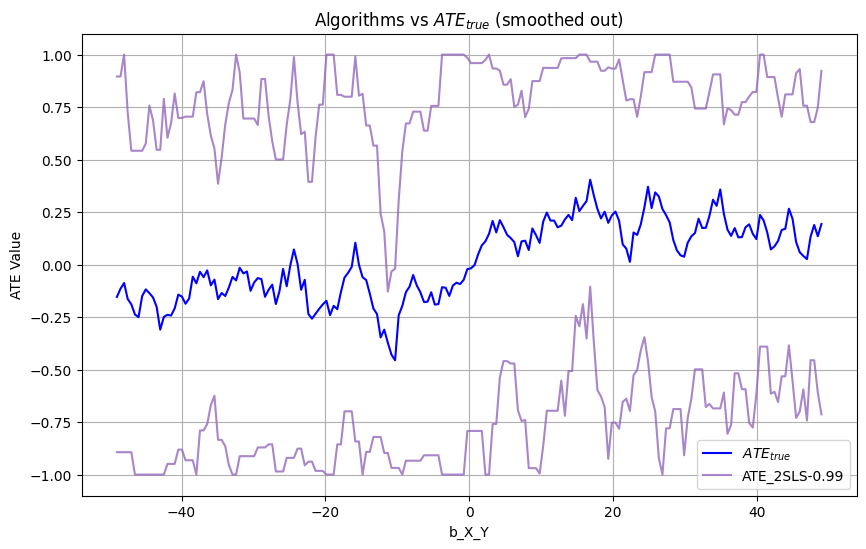

In [42]:
algs = contIV.get_algorithms('ATE')
PlottingUtil.print_bound_statistics_table(contIV.data, algs)
PlottingUtil.plot_smoothed_query_vs_bounds(contIV.data, 'ATE', algs, 5)

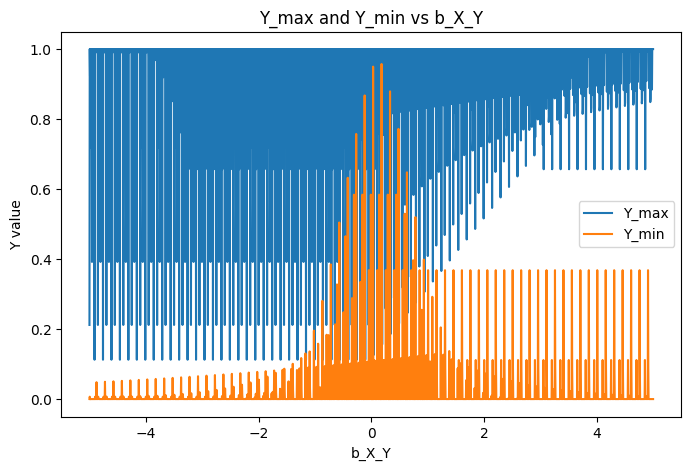

In [107]:
import matplotlib.pyplot as plt

y_label = 'Y'
plt.figure(figsize=(8, 5))
plt.plot(data['b_X_Y'], data[f'{y_label}_max'], label=f'{y_label}_max')
plt.plot(data['b_X_Y'], data[f'{y_label}_min'], label=f'{y_label}_min')
# plt.plot(data['b_X_Y'], data[f'{y_label}_mean'], 'o-', label=f'{y_label}_mean')
plt.xlabel('b_X_Y')
plt.ylabel(f'{y_label} value')
plt.title(f'{y_label}_max and {y_label}_min vs b_X_Y')
plt.legend()
plt.show()

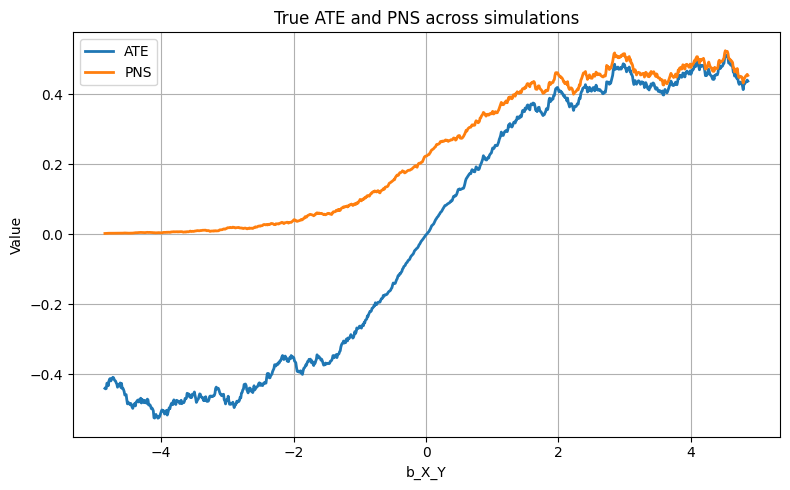

In [49]:
data = BinaryIV.generate_data_rolling_ate(1000, b_lower=-5, b_upper=5)

PlottingUtil.plot_ate_pns(data, window=30)

In [14]:
data = BinaryIV.generate_data_rolling_ate(1)
binaryIV = BinaryIV('IV Dag', data)
algs = ['ATE_zaffalonbounds']

algorithms = [alg for alg in binaryIV.get_algorithms('ATE') if 'zaffalonbounds' not in alg]
algorithms
runtimes = binaryIV.run(algs)

Running ATE_zaffalonbounds...
ATE_zaffalonbounds completed in 18.52 seconds.
Total runtime: 18.52 seconds.


In [15]:
algorithms = list(runtimes['runtimes'].keys())
ate_algs = binaryIV.get_algorithms('ate')
# PlottingUtil.print_bound_statistics(binaryIV.data, ate_algs)
PlottingUtil.print_bound_statistics_table(binaryIV.data, algs)
PlottingUtil.plot_smoothed_query_vs_bounds(binaryIV.data, 'ATE', algs, 5, False)

         Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width
ATE_zaffalonbounds          0.00             0.00          0.5236      0.5236
Error: The 'b_X_Y' column has constant or invalid values. Cannot plot.
